## Kütüphaneler

In [171]:
# Use this cell to regroup all your imports
# Bu hücre: Notebook boyunca kullanacağımız tüm kütüphaneleri tek yerde toplar.
# Amaç: Her hücrede tekrar tekrar import yazmamak + projenin “alet çantası”nı baştan kurmak.

import matplotlib.pyplot as plt
# matplotlib: temel grafik çizimi (histogram, scatter, çizgi grafikleri vb.)

import numpy as np
# numpy: sayısal işlemler, diziler (array), matris/vektör hesapları (ML’in altyapısı)

import pandas as pd
# pandas: tablo veri (DataFrame) okuma/temizleme/işleme (train/test CSV’leri için ana araç)

import seaborn as sns
# seaborn: matplotlib üstünde daha kolay ve şık görselleştirme (EDA için çok pratik)

from scipy import stats
# scipy.stats: istatistiksel fonksiyonlar (dağılımlar, z-score, aykırı değer analizi vb.)

from tempfile import mkdtemp
# mkdtemp: geçici bir klasör oluşturur (bazı işlemlerde ara dosyalar için)

from shutil import rmtree
# rmtree: klasör ve içeriğini siler (geçici klasörleri temizlemek için)

from xgboost import XGBRegressor
# XGBRegressor: XGBoost’un regresyon modeli (tabular veride genelde çok güçlü bir model)

from sklearn import set_config
set_config(display = 'diagram')
# set_config(display='diagram'): Pipeline/Transformer yapısını notebook’ta şema olarak gösterir
# (Pipeline'ları görsel okumayı kolaylaştırır)

# Sklearn preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator, TransformerMixin: Kendi “custom transformer”ını yazıp Pipeline’a takabilmek için
# (örn: özel feature engineering adımı tanımlamak)

from sklearn.compose import make_column_transformer, make_column_selector
# ColumnTransformer araçları: sayısal ve kategorik kolonlara farklı işlemler uygulamak için
# make_column_selector: kolon tipine göre otomatik seçmeye yardım eder (numeric/categorical)

from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
# Ensemble (topluluk) modelleri:
# RandomForestRegressor: birden çok ağacın ortalaması (bagging) -> genelde daha stabil, varyansı azaltır
# AdaBoostRegressor: hatalara odaklanarak ardışık öğrenme -> bazı senaryolarda güçlü
# GradientBoostingRegressor: ardışık ağaçlarla hatayı azaltır -> güçlü boosting yaklaşımı
# VotingRegressor: farklı modellerin tahminlerini birleştirip ortalama alır
# StackingRegressor: modellerin çıktısını “üst modele” feature yapar (daha gelişmiş birleşim)

from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
# Feature selection (özellik seçimi) araçları:
# VarianceThreshold: varyansı çok düşük (neredeyse sabit) kolonları eler
# SelectPercentile: en iyi %X feature’ı seçer
# mutual_info_regression: hedef ile ilişkinin gücünü (doğrusal olmayan ilişkiler dahil) ölçen skor
# SelectFromModel: bir modelin feature importance / coef bilgisine göre seçim yapar

from sklearn.impute import SimpleImputer, KNNImputer
# Missing value (eksik değer) doldurma:
# SimpleImputer: mean/median/most_frequent gibi basit doldurma
# KNNImputer: benzer örneklere (komşulara) bakarak daha akıllı doldurma (daha maliyetli)

from sklearn.linear_model import Ridge, LinearRegression
# Lineer modeller:
# LinearRegression: baseline (en temel doğrusal regresyon)
# Ridge: L2 regularization ekler -> overfitting’i azaltmaya yardımcı olur

from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
# Değerlendirme metrikleri:
# mean_squared_error (MSE): kareli hata
# mean_squared_log_error (MSLE): log-space hata (House Prices gibi “oran” odaklı durumlarda sık kullanılır)
# make_scorer: özel skor fonksiyonunu scikit-learn’e uygun hale getirir (CV/GridSearch için)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# Model seçimi ve doğrulama:
# train_test_split: train/validation ayırma
# cross_val_score: K-fold CV ile performansı daha güvenilir ölçme
# GridSearchCV: belirlediğin parametre ızgarasında sistematik arama
# RandomizedSearchCV: parametre uzayında rastgele arama (genelde daha hızlı)

from sklearn.neighbors import KNeighborsRegressor
# KNN regresyon: “komşuların ortalaması” mantığıyla tahmin (ölçekleme hassastır, veri büyüyünce yavaşlar)

from sklearn.pipeline import make_pipeline
# Pipeline: preprocessing + model adımlarını tek akışta birleştirir
# En kritik fayda: aynı dönüşümler train ve validation/test’e tutarlı uygulanır (leakage riski azalır)

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
# Preprocessing:
# MinMaxScaler: sayısal değerleri 0-1 aralığına çeker
# OneHotEncoder: kategorik değişkenleri 0/1 sütunlara açar (en yaygın yöntem)
# OrdinalEncoder: kategorileri sırayla sayıya çevirir (sıralı kategorilerde mantıklı)

from sklearn.svm import SVR
# SVR: SVM tabanlı regresyon (özellikle ölçeklemeye duyarlı, bazı veri tiplerinde iyi çalışır)

from sklearn.tree import DecisionTreeRegressor
# DecisionTreeRegressor: tek karar ağacı (yorumlanabilir ama overfitting’e daha açık olabilir)


# 🏆 Kaggle Batch Yarışması

**İlk Kaggle yarışmanıza hoş geldiniz!**

<img src='https://d32aokrjazspmn.cloudfront.net/materials/kaggle-batch-challenge.png' width=600>

Amacınız açık yarışma [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) için **çevrimiçi bir cevap göndermek**tir 🏠

Neyse ki, bootcamp'te daha önce konut veri seti ile karşılaştınız! **Baseline model** oluşturmanız için yarı rehberli olacaksınız ve sadece baseline oluşturduktan sonra onu geliştirmekte ve iyileştirmekte özgür olacaksınız. Problemi **pipeline'lar** kullanarak ele alacağız (en iyi pratik)!

Kaggle hakkında birkaç söz:
- Kaggle gönderilerinizi tüm katılımcılar arasında sıralar!
- Herkes 2 ay sonra genel sıralama tablosundan kaldırılır
- Günde 10'a kadar gönderi yapabilirsiniz

🧹 Bugün uzun notebook'unuzu **düzenli** tutmayı pratik yapmanın mükemmel günü 🧹
- Komut paletinden tüm başlıkları daraltın (`Cmd + Shift + P`)
- "İdempotent" kalın (`Restart & Run All` asla çökmemeli)
- Değişkenleri dikkatli olarak adlandırın ve silin

## Kaggle Kurulumu

👉 Yarışmaya katılmak istiyorsanız Kaggle'da hesap oluşturun

👉 [House Prices Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) yarışmasına katılın


## Veri Yükleme

Yarışma talimatlarında, Kaggle'dan mevcut notebook klasörünüze ihtiyacınız olan her şeyi indirmek için gerekli adımları zaten çalıştırmış olmalısınız:

- `train.csv` sizin `X` ve `y` içeren `(1460, 81)` eğitim setinizdir
- `test.csv` ilişkili hedef `y` olmadan `(1459, 80)` test setinizdir 😈
- `sample_submission.csv` cevabınızı göndermek için gereken formatı açıklar

ℹ️ Veri setinin ayrıntılı açıklamasını [burada](https://d32aokrjazspmn.cloudfront.net/materials/kaggle_houses_data_description.txt) bulacaksınız. Yarışma boyunca buna başvurun!

Amacınız test setinizdeki eksik `y_pred`'i tahmin etmek ve `test_score`'unuzu ve sıralamanızı keşfetmek için göndermektir

❓ Eğitim veri setini `data` adlı bir DataFrame'e yükleyin ve `X` ve `y`'nizi oluşturun. Şekillerini inceleyin.

**İpucu:** CSV dosyasını kontrol ederseniz, `Id` adlı bir sütun olduğunu fark edeceksiniz. CSV dosyasını DF'ye okurken, iki ID sütunu oluşmaması için `index_col="Id"` ayarladığınızdan emin olun 😉

pwd # mevcut yarışma klasöründe olduğunuzdan emin olalım
curl https://d32aokrjazspmn.cloudfront.net/materials/houses-train-raw.csv > data/train.csv
curl https://d32aokrjazspmn.cloudfront.net/materials/houses_test_raw.csv > data/test.csv
curl https://d32aokrjazspmn.cloudfront.net/materials/houses_sample_submission.csv > data/sample_submission.csv

In [172]:
# 1) Dosyaları oku (Id index olsun)
train_path = "data/train.csv"
test_path  = "data/test.csv"
sub_path   = "data/sample_submission.csv"

train_df = pd.read_csv(train_path, index_col="Id")
test_df  = pd.read_csv(test_path, index_col="Id")
sample_sub = pd.read_csv(sub_path, index_col="Id")

# 2) X ve y ayır (hedef: SalePrice)
y = train_df["SalePrice"]
X = train_df.drop(columns=["SalePrice"])

In [173]:
# 3) Hızlı kontroller
print("X shape:", X.shape)
print("y shape:", y.shape)
print("test shape:", test_df.shape)
print("sample_submission shape:", sample_sub.shape)


X shape: (1460, 79)
y shape: (1460,)
test shape: (1459, 79)
sample_submission shape: (1459, 1)


In [174]:
display(X.head(3))
display(y.head(3))
display(test_df.head(3))
display(sample_sub.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


Id
1    208500
2    181500
3    223500
Name: SalePrice, dtype: int64

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570


# 🐣 1. BASELINE

## 1.1 İlk Özellik Genel Bakış

79 özellik ilk baseline pipeline için tek tek ele alınamayacak kadar fazla! Onları yalnızca `dtype`'larına göre ele alalım:

❓ Kaç sayısal özellik ve kaç kategorik özelliğimiz var?

In [175]:
# dtype bazlı kolon listeleri
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(exclude=["number"]).columns

print("Sayısal özellik sayısı:", len(num_cols))
print("Kategorik özellik sayısı:", len(cat_cols))

Sayısal özellik sayısı: 36
Kategorik özellik sayısı: 43


In [176]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [177]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

❓ Eğitim setimizdeki her kategorik özellik için **benzersiz değer** sayısını içeren `feat_categorical_nunique` adlı bir Series oluşturun. Toplamda kaç benzersiz kategori var?

In [178]:
feat_categorical_nunique = X[cat_cols].nunique().sort_values(ascending=False)

print(feat_categorical_nunique)  # istersen sadece head() ile bak
print("\nToplam benzersiz kategori sayısı:", int(feat_categorical_nunique.sum()))


Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
KitchenQual       4
MiscFeature       4
Fence             4
BsmtCond          4
ExterQual         4
BsmtExposure      4
BsmtQual          4
LandSlope         3
PoolQC            3
GarageFinish      3
PavedDrive        3
MasVnrType        3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64

Toplam benzersiz kategori sayısı: 251


🤔 Tüm kategorik özellikleri `OneHotEncode` edersek, özellik matrisimiz `X_preproc` sadece 1400 gözlem için neredeyse 300 (yüksek oranda ilişkili) özellikle oldukça büyük ve seyrek hale gelir. İdeal olarak, modelimize maksimum ~50 özellik beslemeyi hedeflemeliyiz (📚 bu [pratik kuralı](https://datascience.stackexchange.com/a/11480/98300) okuyun)

Ön işleme sonrası kategorik özellik sayısını azaltmak için bildiğimiz 2 ana strateji var:
1. **[Kaldır](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** modelimize çok az açıklama getiren özellikler; bu özellik öneminin istatistiksel analizi gerektirebilir
2. **[Ordinal kodlama](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** (one-hot kodlama yerine) kategorik özellikler tamsayılara; ancak bu, düzgün ele alınmazsa zararlı olabilecek bir "sıra" kavramı (1 > 2 > 3 > ...) oluşturur!

❓ Kategorik özellik başına benzersiz değer sayısının **histogramını** çizin. Hızlı kazançlar görüyor musunuz?

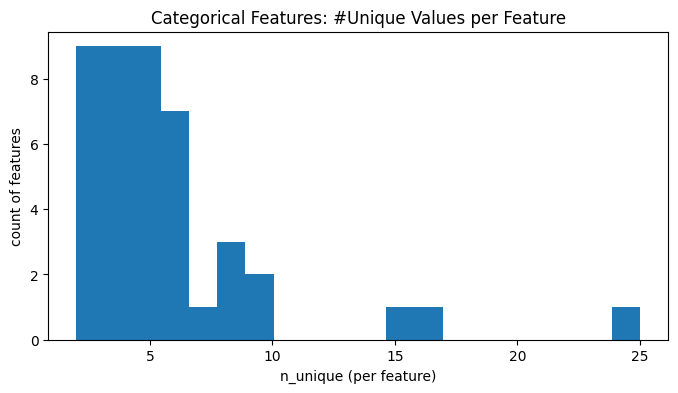

In [179]:
# Kategorik kolon başına benzersiz değer sayısı dağılımı (histogram)
plt.figure(figsize=(8, 4))
plt.hist(feat_categorical_nunique.values, bins=20)
plt.title("Categorical Features: #Unique Values per Feature")
plt.xlabel("n_unique (per feature)")
plt.ylabel("count of features")
plt.show()

Histogram bize şunu gösteriyor:
Kategorik kolonların büyük çoğunluğu 2–6 arası benzersiz değere sahip. (soldaki “yığılma”)
Az sayıda kolon “yüksek kardinalite”: ör. 15–25 benzersiz değer (sağdaki kuyruk). Çıktıda Neighborhood=25 gibi.

Neden önemli?
One-Hot Encoding (OHE) yapınca:
Her kategorik kolon kadar yeni sütun oluşur (kabaca n_unique kadar).
Neighborhood gibi 25’lik bir kolon tek başına 25 dummy sütun üretir.
Birkaç tane böyle kolon olunca feature sayısı hızla şişer → model daha zor öğrenir, daha yavaş çalışır, overfit riski artabilir (özellikle baseline’da).

Histogramı bu yüzden çiziyoruz:
OHE ile patlayacak kolon var mı? Eşik değer nerede mantıklı? diye hızlı bir “fotoğraf” çekiyoruz.

In [180]:
feat_categorical_nunique

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
KitchenQual       4
MiscFeature       4
Fence             4
BsmtCond          4
ExterQual         4
BsmtExposure      4
BsmtQual          4
LandSlope         3
PoolQC            3
GarageFinish      3
PavedDrive        3
MasVnrType        3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64

💡 Başlangıç noktası olarak, **7 veya daha fazla benzersiz değeri** olan tüm özellikleri basitçe **kaldırmaya** ve geri kalanını one-hot kodlamaya ne dersiniz? Ordinal kodlama ve istatistiksel özellik seçimini pipeline'ımızın bir sonraki iterasyonu için saklayalım.

❓ OHE yapılacak özelliklerin adlarını aşağıda `feat_categorical_small` adlı listede saklayın. Kaç özellik OHE edilecek?

In [181]:
# OHE yapılacak kategorik kolonlar: benzersiz değer sayısı 7'den küçük olanlar
feat_categorical_small = feat_categorical_nunique[feat_categorical_nunique < 7].index.tolist()

# (kontrol amaçlı) OHE dışı bırakılacaklar: 7 veya daha fazla olanlar
feat_categorical_large = feat_categorical_nunique[feat_categorical_nunique >= 7].index.tolist()

len(feat_categorical_small), len(feat_categorical_large)


(34, 9)

In [182]:
feat_categorical_nunique[feat_categorical_nunique >= 7]

Neighborhood    25
Exterior2nd     16
Exterior1st     15
Condition1       9
SaleType         9
HouseStyle       8
RoofMatl         8
Condition2       8
Functional       7
dtype: int64

In [183]:
len(feat_categorical_small), feat_categorical_nunique[feat_categorical_nunique < 7].head()


(34,
 BsmtFinType2     6
 RoofStyle        6
 BsmtFinType1     6
 SaleCondition    6
 Heating          6
 dtype: int64)

Bu notebook’un önerdiği “baseline” kural şu:
n_unique >= 7 olan kategorik kolonları şimdilik kaldır
n_unique < 7 olanları OHE yap

Mantık:
<7 olanlar OHE için “ucuz”: az sütun üretir.
>=7 olanlar OHE için “pahalı”: sütun sayısını büyütür.

Baseline’da hedef: en hızlı şekilde çalışan, makul skor veren basit bir pipeline kurmak.
Buradaki 7 “doğru tek sayı” değil; bir başlangıç eşiği. Sonraki iterasyonlarda bu kolonlara geri dönüp (target encoding/ordinal, frekans birleştirme, model bazlı selection vb.) daha akıllı işler yapacağız.

🧪 Kodunuzu aşağıda test edin (ve geçtikten sonra hücreyi temizleyin)

In [184]:

from nbresult import ChallengeResult

result = ChallengeResult(
    'features_overview',
    n=len(feat_categorical_small)
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/tumay/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/tumay/code/S17D2-S-kaggle-competition/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2
collecting ... collected 1 item

test_features_overview.py::TestFeaturesOverview::test_feat_categorical_small PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/features_overview.pickle

git commit -m 'Completed features_overview step'

git push origin master



## 1.2 Baseline Pipeline

### a) Ön İşleme

❓ Aşağıda açıklanan temel ön işleme pipeline'ını kodlayalım. `preproc_baseline` altında kaydedin.

Kategorik özellikler için:
- En sık değerlerle Simple-Impute
- Başlangıçta 7'den az benzersiz değeri olan özellikleri One-Hot Encode et
- Diğer tüm özellikleri kaldır


Sayısal özellikler için:
- `mean` stratejisiyle Simple-Impute
- Min-Max Scale


<details>
    <summary>ℹ️ Profesyonel ipucu için buraya tıklayın</summary>

Eğer kendinize güveniyorsanız, `Pipeline` veya `ColumnTransformer`'ın daha uzun söz dizimi yerine Sklearn'in daha kısa söz dizimi `make_pipeline` veya `make_column_transformer`'ını deneyebilirsiniz; her adıma manuel olarak isim vermekten kaçınmak istiyorsanız da yararlıdır.
</details>

In [185]:
from sklearn.pipeline import Pipeline
# Pipeline: Birden fazla işlemi (ör. eksik değer doldurma + ölçekleme) sıraya koyup tek bir “model adımı” gibi çalıştırır.

from sklearn.compose import ColumnTransformer
# ColumnTransformer: Farklı kolon gruplarına farklı ön işleme uygulamak için kullanılır.
# (Sayısal kolonlara başka, kategorik kolonlara başka işlem gibi.)

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
])

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

preproc = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, feat_categorical_small),  # <-- kritik: cat_cols değil
    ],
    remainder="drop"
)


❓ Ön işlenmiş DataFrame'inizin **şekline** bakın ve `shape_preproc_baseline`'a kaydedin

In [186]:
# 1) Preprocess'ü train X üzerinde fit edip dönüştürelim
X_preproc_baseline = preproc.fit_transform(X)

# 2) Ortaya çıkan matrisin şeklini alalım (rows, cols)
shape_preproc_baseline = X_preproc_baseline.shape

# İstersen kontrol amaçlı yazdır
shape_preproc_baseline


(1460, 178)

🧪 Kodunuzu aşağıda test edin

In [187]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'preproc_baseline',
    shape=shape_preproc_baseline
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/tumay/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/tumay/code/S17D2-S-kaggle-competition/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2
collecting ... collected 1 item

test_preproc_baseline.py::TestPreprocBaseline::test_shape PASSED         [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/preproc_baseline.pickle

git commit -m 'Completed preproc_baseline step'

git push origin master



### b) Tahminleyici Ekle

❓ `preproc_baseline`'a basit bir Decision Tree modeli ekleyin ve `pipe_baseline` değişkeninde saklayın.

In [188]:
# ColumnTransformer'ının adı preproc'tu
preproc_baseline = preproc

In [189]:
# preproc_baseline + basit DecisionTreeRegressor'ı tek pipeline'da birleştiriyoruz
pipe_baseline = make_pipeline(
    preproc_baseline,
    DecisionTreeRegressor(random_state=42)
)

### c) Çapraz Doğrulama

❓ Kaggle [yarışma değerlendirme kurallarını](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) okuyun. Hangi performans metriğine ihtiyacınız var? Sklearn'de hazır olarak mevcut mu?

Ne yazık ki değil! Herhangi bir çapraz doğrulama veya Grid Search'e geçmek için özel `sklearn.metrics.scorer` nesnemizi oluşturmamız gerekecek. İşlem aşağıda açıklanmıştır:


1. [`make_scorer`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) kullanarak `scoring` `kwarg` için değer olarak geçirilebilen `rmsle` adlı bir scorer oluşturun:  
    ```python
    cross_val_score(pipe_baseline, X, y, cv=5, scoring=rmsle)
    ```
2. _Maksimize edildiğinde_ en iyi olan negatif karşılığını `rmsle_neg` oluşturun; `GridSearchCV` her zaman bir skoru _maksimize_ etmeye çalıştığı için bu daha sonra işe yarayacak 😉
    ```python
    GridSearchCV(pipe_baseline, param_grid=..., cv=5, scoring=rmsle_neg)
    ```

RMSLE formülü

$$\text{RMSLE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2.}$$

In [190]:
# 1) RMSLE scorer (küçük daha iyi)

def rmsle(y_true, y_pred):
    # MSLE log(1+y) istediği için negatif tahmin gelirse bozulur → 0'a kırpıyoruz
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)


❓ Baseline performansınıza ilk bakış için bu metriği kullanarak `pipe_baseline`'ınızı 5-kat çapraz doğrulama yapın.    

Ortalama skorunuzu `score_baseline` olarak saklayın

In [191]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    pipe_baseline,
    X,
    y,
    cv=5,
    scoring=rmsle_scorer
)

score_baseline = cv_scores.mean()
score_baseline

/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [12, 13, 21] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [30] during transform. These

np.float64(-0.20959568255271419)

Gerçek (pozitif) RMSLE ≈ 0.2096

### d) Baseline Tahmini

❓ `data` klasöründe sakladığınız Kaggle `test.csv` veri setinden `y_pred_baseline`'ı tahmin edin.

In [192]:
X_test = pd.read_csv("https://d32aokrjazspmn.cloudfront.net/materials/houses_test_raw.csv")
X_test_ids = X_test['Id'] # Keep ids
X_test = X_test.drop(columns=['Id'])

# Predict y_pred_baseline
# 1) Test setini data klasöründen oku (URL yerine local dosya)
X_test = pd.read_csv("data/test.csv")

# 2) Id'yi ayır (submission için)
X_test_ids = X_test["Id"]

# 3) Modelin gördüğü feature seti Id olmadan olmalı
X_test = X_test.drop(columns=["Id"])

# 4) Baseline pipeline'ı train'in tamamında fit et
pipe_baseline.fit(X, y)

# 5) Tahmin al
y_pred_baseline = pipe_baseline.predict(X_test)


❓ Son olarak, göndermeye hazır CSV'nizi `data` klasöründe `submission_baseline.csv` olarak saklayın. Kaggle'ın gereken formatını **dikkatli bir şekilde okuyun** ve anlayın ve aşağıda test edin (şimdilik bu baseline'ı Kaggle'a göndermenize gerek yok).

In [193]:
results = pd.concat([X_test_ids, pd.Series(y_pred_baseline, name="SalePrice")], axis=1)
results.head(1)

,Id,SalePrice
0,1461,129000.0


In [194]:
# Export to Kaggle format submission in the `data` folder
results.to_csv("data/submission_baseline.csv", header=True, index=False)

🧪 Kodunuzu test edin

In [195]:
from nbresult import ChallengeResult

tmp = pd.read_csv("data/submission_baseline.csv")

result = ChallengeResult(
    'submission_baseline',
    score_baseline = score_baseline,
    submission_shape = tmp.shape,
    submission_columns = list(tmp.columns),
    submission_dtypes = str(list(tmp.dtypes)),
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/tumay/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/tumay/code/S17D2-S-kaggle-competition/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2
collecting ... collected 4 items

test_submission_baseline.py::TestSubmissionBaseline::test_score_baseline PASSED [ 25%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_columns PASSED [ 50%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_dtypes PASSED [ 75%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_shape PASSED [100%]

============================== 4 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/submission_baseline.pickle

git commit -m 'Completed submission_baseline step'

git push origin master



In [196]:
results.shape

(1459, 2)

In [197]:
results.isna().sum()

Id           0
SalePrice    0
dtype: int64

In [198]:
results["SalePrice"].describe()

count      1459.000000
mean     179850.679232
std       77464.894724
min       34900.000000
25%      130000.000000
50%      160000.000000
75%      210000.000000
max      625000.000000
Name: SalePrice, dtype: float64

# 🏋️‍♀️ 2. İTERASYONLAR 

🎉 🎉 Tam pipeline'lı bir baseline model oluşturduğunuz için tebrikler! Şimdi iterasyon yapmanın ve performansı iyileştirmenin ne kadar kolay olduğunu göreceksiniz 🚀

Şimdi amacınız tahmininizi iyileştirmek ve **Recap'ten en az 30 dakika önce** Kaggle'a göndermektir ⏳

Aşağıda iyileştirmeler için bazı önerilerimiz var: **savaşlarınızı seçin** ve pipeline'ınızı uygun gördüğünüz şekilde **aşamalı olarak** iyileştirin!

**Tahminleyiciler**

- Ağaç tabanlı ensemble'lar (bugün mutlaka denenmeli); muhtemelen çok kategorik özelliği olan problemler için en uygun
- Stacking!
- XGBoost!

**Ön İşleme** (ilk ensemble modeliniz çalıştıktan sonra)

- Değerlerinde gizli sıra kavramı olan kategorik özelliklerin **Ordinal Kodlaması** (örn. "kötü", "ortalama", "iyi")
- Gereksiz özellikleri kaldırmak için **İstatistiksel Özellik Seçimi** (aşırı öğrenmeyi önler ve eğitim süresini kısaltır)
- `SalePrice` yerine `log(SalePrice)` tahmin et?
- 🤷

## 2.1 Ön İşleme İterasyonu ♲ 
**⚠️ Bölüm 2.2'de tahminleyicilerinizde iterasyon yaptıktan sonra buraya geri dönün ⚠️**

⏩ Kullanımda değilsem beni daralt!

### a) Ordinal Kodlama (~1s)

❓ Aşağıdaki özelliğe bakın. Akıllıca bir şekilde sayısal olarak kodlanamaz mı?
```
ExterQual: Dıştaki malzemenin kalitesini değerlendirir
		
       Ex	Mükemmel
       Gd	İyi
       TA	Ortalama/Tipik
       Fa	Adil
       Po	Zayıf
```

💡 Neyse ki, `OrdinalEncoder` ve `categories` argümanı tam da bunu yapmamıza izin veriyor! Aşağıda kontrol edin ve bunun nasıl çalıştığını anladığınızdan emin olun 👇

In [199]:
# X'te olmayan kolonları listelerden temizle
ord_cols = [c for c in ord_cols if c in X.columns]
cat_cols = [c for c in cat_cols if c in X.columns]

# nominal kolonları tekrar hesapla
nom_cols = [c for c in cat_cols if c not in ord_cols]


In [200]:
# Define specific order for features
# Note: if you change this order, it will change the output for .transform()
feature_A_sorted_values = ['bad', 'average', 'good']
feature_B_sorted_values = ['dirty', 'clean', 'new']

encoder = OrdinalEncoder(
    categories=[
        feature_A_sorted_values,
        feature_B_sorted_values
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

# Just some random training data
XX = [
    ['good', 'dirty'],
    ['bad', 'new'],
    ['average', 'clean'],
]

encoder.fit(XX)

encoder.transform([
        ['bad', "dirty"],
        ["average", "clean"],
        ['good', 'new'],
        ['bad', 'oops never seen this label before']
])

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 0., -1.]])

❓ **Sıra sizde**: kategorik ön işleyicinizi şunlara bölün

- **Bazı özellikleri** (seçiminize göre) ordinal kodlamak için `preproc_ordinal`
- Diğerlerini one-hot kodlamak için `preproc_nominal`


<details>
    <summary>İpuçları</summary>

- Özelliklerin adlarını ve sıralı değerlerini sabit kodlamaktan kaçınamayacaksınız! Düzenli olun!
- Kötü sürprizlerden kaçınmak için özelliklerinizi alfabetik olarak sıralamanız iyi bir uygulamadır
</details>

In [ ]:
# =========================
# 1) Ordinal (sıralı) kolonları seç
# =========================
# Not: Bu listeyi “sıralı anlamı olan” kategorik kolonlarla başlatıyoruz.
# daha sonra ekleme/çıkarma yapabiliriz.
ord_cols = sorted([
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "BsmtQual",
    "ExterCond",
    "ExterQual",
    "FireplaceQu",
    "Functional",
    "GarageCond",
    "GarageQual",
    "HeatingQC",
    "KitchenQual",
    "LandSlope",
    "LotShape",
    "PavedDrive",
    "PoolQC",
    "Utilities",
])

# Nominal (sırasız) kolonlar: cat_cols içinden ordinal olmayanlar
nom_cols = sorted([c for c in cat_cols if c not in ord_cols])


# =========================
# 2) Her ordinal kolon için “sıra listeleri” (categories=...)
# =========================
# Bu sırayı SEN belirliyorsun: kötü -> iyi şeklinde.
# Not: Eksik değerler için genelde veri setinde "None" gibi stringler var,
# ama imputer ile de dolduruyoruz. Bu yüzden listelere "None" ekliyoruz.
ordinal_categories = [
    # BsmtCond
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    # BsmtExposure
    ["None", "No", "Mn", "Av", "Gd"],
    # BsmtFinType1
    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    # BsmtFinType2
    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    # BsmtQual
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    # ExterCond
    ["Po", "Fa", "TA", "Gd", "Ex"],
    # ExterQual
    ["Po", "Fa", "TA", "Gd", "Ex"],
    # FireplaceQu
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    # Functional
    ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    # GarageCond
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    # GarageQual
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    # HeatingQC
    ["Po", "Fa", "TA", "Gd", "Ex"],
    # KitchenQual
    ["Po", "Fa", "TA", "Gd", "Ex"],
    # LandSlope
    ["Sev", "Mod", "Gtl"],
    # LotShape
    ["IR3", "IR2", "IR1", "Reg"],
    # PavedDrive
    ["N", "P", "Y"],
    # PoolQC
    ["None", "Fa", "TA", "Gd", "Ex"],
    # Utilities
    ["ELO", "NoSeWa", "NoSewr", "AllPub"],
]


# =========================
# 3) Kategorik ön işleyiciyi ikiye böl: preproc_ordinal & preproc_nominal
# =========================
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Ordinal pipeline: en sık değerle doldur + OrdinalEncode
preproc_ordinal = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(
        categories=ordinal_categories,
        handle_unknown="use_encoded_value",
        unknown_value=-1
    )),
])

# Nominal pipeline: en sık değerle doldur + OneHotEncode
# drop="if_binary": ikili kolonlarda 2 dummy yerine 1 dummy üretir (kolon sayısını şişirmez)
preproc_nominal = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

# (İstersen hızlı kontrol)
len(ord_cols), len(nom_cols)


(18, 25)

18 adet ordinal kodlanacak kategorik özellik
25 adet one-hot (nominal) kodlanacak kategorik özellik

### b) İstatistiksel Özellik Seçimi (~30dk)

Amacımız aşırı öğrenmeyi sınırlamak ve eğitim süresini kısaltmak için en az ilginç özellikleri kaldırmaktır.  

🔥 Pipeline'ınızda doğrudan Sklearn'in [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) dönüştürücülerini kullanacağız!

❗️ Başlamak için bugün **sadece Seçenek 1'i** denemenizi öneriyoruz. Seçenek 2 ve 3 Recap'te düzeltilecek!

#### Seçenek 1 (Önerilen) - <font color=green>Tek değişkenli</font> Özellik Seçimi
*hedef `y` ile karşılıklı bilgilerine dayalı*

- `preproc` pipeline'ınızın sonuna bir `SelectPercentile` filtresi eklemeyi tereddüt etmeyin.
- Bu, tek tek alındığında hedefimizi en az açıklayan özellikleri filtreleyecek!
- SelectPercentile'a geçirmenizi önerdiğimiz istatistiksel test `mutual_info_regression`

<details>
    <summary markdown='span'>🤔 Karşılıklı bilgi nedir? Buraya tıklayın!</summary>

- [Karşılıklı Bilgi](https://en.wikipedia.org/wiki/Mutual_information) iki olasılık dağılımı arasındaki **istatistiksel** mesafedir
- Korelasyon iki rastgele değişken arasındaki **doğrusal** mesafedir
- Karşılıklı Bilgi daha geneldir ve X'i gözlemledikten sonra Y'deki belirsizliğin azalmasını ölçer.
- Öte yandan, zaten düzgün değişkenlerle (sürekli sayısal değişkenler gibi) çalıştığınızı biliyorsanız, bazen korelasyon onlar hakkında daha fazla bilgi verebilir, örneğin ilişkileri monoton ise.

[Bu animasyona](https://twitter.com/ari_seff/status/1409296508634152964) bakın
</details>

In [202]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

feat_selector = SelectPercentile(
    score_func=mutual_info_regression,
    percentile=60  # %50 en iyi feature
)

In [203]:
from sklearn.compose import ColumnTransformer

preproc_iter1 = Pipeline(steps=[
    ("preproc", ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols),
            ("ord", preproc_ordinal, ord_cols),
            ("nom", preproc_nominal, nom_cols),
        ],
        remainder="drop"
    )),
    ("feat_select", feat_selector)
])

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

pipe_iter1 = make_pipeline(
    preproc_iter1,
    DecisionTreeRegressor(random_state=42)
)


In [205]:
cv_scores_iter1 = cross_val_score(
    pipe_iter1,
    X,
    y,
    cv=5,
    scoring=rmsle_scorer
)

score_iter1 = cv_scores_iter1.mean()
score_iter1

/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [5, 20] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [4, 6] during transform. These 

np.float64(-0.2115998404862315)

#### Seçenek 2 - <font color=green>Çok değişkenli</font> Özellik Seçimi
*hedef `y` ile birleşik ilişkilerine dayalı*

🤔 Diğerleriyle birleştirildiğinde bile hedefimizi tahmin etmeye yardımcı olmayan özellikleri kaldırmak istiyoruz.

1️⃣ Bunu yapmak için, bir tahminleyici ile birlikte [`permutation_importance`](https://scikit-learn.org/stable/modules/permutation_importance.html) metriğini kullanabileceğimizi unutmayın! Her özellik için bir pipeline eğitir ve hangi özelliğin rastgele karıştırıldığında performans skorumuzu en çok *düşürdüğünü* tahmin eder. Bunlar kaldırmak istemediğimiz en önemli özelliklerimiz olacaktır.

En iyi şey, `scikit-learn`'in bu metodolojiyi [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) dönüştürücüsü sayesinde doğrudan `preproc` pipeline'ınıza entegre etmenize izin vermesidir; bu, `cross_val_score`'a göre en az önemli özellikleri özyinelemeli olarak kaldıracaktır.

Ancak çok özelliğiniz olduğunda, bu işlem eğitilmesi son derece uzun sürebilir.

2️⃣ Alternatif olarak, daha hızlı bir yol, fit edildiğinde zaten bazı `feature_importance` ölçüleri çıkaran modelleri kullanmak olacaktır. Örneğin, Gini tabanlı `feature_importance_` ile ağaçlar veya L1 `coef_` ile Lasso regresyonları. `scikit-learn` zaten tam da bunu yapmak için [`SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) dönüştürücüsüne sahiptir.

In [206]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

feature_selector = SelectFromModel(
    estimator=DecisionTreeRegressor(random_state=42, max_depth=5),
    threshold="median"
)

In [207]:
from sklearn.pipeline import make_pipeline

pipe_iter2 = make_pipeline(
    preproc,              # ordinal + nominal + numeric
    feature_selector,     # çok değişkenli feature selection
    DecisionTreeRegressor(random_state=42)
)

In [208]:
cv_scores_iter2 = cross_val_score(
    pipe_iter2,
    X,
    y,
    cv=5,
    scoring=rmsle_scorer
)

score_iter2 = cv_scores_iter2.mean()
score_iter2

/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [12, 13, 21] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [30] during transform. These

np.float64(-0.20959568255271419)

In [209]:
pipe_iter2.fit(X, y)

# Seçilen feature sayısı
support = pipe_iter2.named_steps["selectfrommodel"].get_support()
print("Seçilen feature sayısı:", support.sum())
print("Toplam feature sayısı:", support.shape[0])


Seçilen feature sayısı: 178
Toplam feature sayısı: 178


#### Randomforest deneyelim

In [210]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe_rf = make_pipeline(
    preproc,
    RandomForestRegressor(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    )
)

cv_scores_rf = cross_val_score(
    pipe_rf, X, y, cv=5, scoring=rmsle_scorer
)

score_rf = cv_scores_rf.mean()
score_rf


/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [12, 13, 21] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [30] during transform. These

np.float64(-0.1455486588260073)

#### GradientBoosting deneyelim

In [211]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_gb = make_pipeline(
    preproc,
    GradientBoostingRegressor(
        random_state=42
    )
)

cv_scores_gb = cross_val_score(
    pipe_gb, X, y, cv=5, scoring=rmsle_scorer
)

score_gb = cv_scores_gb.mean()
score_gb


/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [12, 13, 21] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [30] during transform. These

np.float64(-0.1329318936119889)

In [212]:
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer

# y'yi log1p'e çeviriyoruz (log(1+y))
y_log = np.log1p(y)

# log ölçekte RMSE (küçük daha iyi)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)  # sklearn "negatif" döndürür

In [213]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

pipe_gb_log = make_pipeline(
    preproc,
    GradientBoostingRegressor(
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3
    )
)

cv_scores = cross_val_score(
    pipe_gb_log,
    X,
    y_log,
    cv=5,
    scoring=rmse_scorer
)

score_gb_log = cv_scores.mean()
score_gb_log



/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [12, 13, 21] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [30] during transform. These

np.float64(-0.12596764603187885)

In [214]:
# 1) model: train'in tamamında fit (log hedefle)
pipe_gb_log.fit(X, y_log)

# 2) test seti için log tahmin
y_pred_log = pipe_gb_log.predict(X_test)

# 3) orijinal ölçeğe geri dön (SalePrice)
y_pred_gb = np.expm1(y_pred_log)

In [215]:
results = pd.concat([X_test_ids, pd.Series(y_pred_gb, name="SalePrice")], axis=1)
results.to_csv("data/submission_gb_log.csv", index=False)
results.head()

,Id,SalePrice
0,1461,121178.259308
1,1462,156248.469326
2,1463,179962.335985
3,1464,189662.758791
4,1465,191063.274474


#### Seçenek 3 - <font color=green>Denetimsiz</font> Seçim?
*sadece `X`'in özelliklerine dayalı filtre*

❓ Hızlı bir kazanç, en düşük varyansa sahip özellikleri kaldırmaktır. Düşünün: sadece bir değeri olan bir özellik yararsızdır (ve 0 varyansa sahiptir).

Pipeline'ınızın sonuna bir [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) eklemeyi tereddüt etmeyin!

In [216]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

# numeric
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
])

# ordinal
preproc_ordinal = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(
        categories=ordinal_categories,
        handle_unknown="use_encoded_value",
        unknown_value=-1
    )),
])

# nominal (OHE dense!)
preproc_nominal = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False)),
])

preproc = ColumnTransformer(transformers=[
    ("num", num_pipe, num_cols),
    ("ord", preproc_ordinal, ord_cols),
    ("nom", preproc_nominal, nom_cols),
], remainder="drop")


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# log target
y_log = np.log1p(y)

# log-RMSE scorer (daha önce yaptığım rmse_scorer)
# rmse_scorer hazır olduğunu varsayıyorum

pipe_iter3 = make_pipeline(
    preproc,
    VarianceThreshold(threshold=0.0),  # 0 varyanslıları atar
    GradientBoostingRegressor(random_state=42)
)

cv_scores_iter3 = cross_val_score(
    pipe_iter3, X, y_log, cv=5, scoring=rmse_scorer
)
score_iter3 = cv_scores_iter3.mean()
score_iter3


/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [5, 20] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [4, 6] during transform. These 

np.float64(-0.12430883836795734)

In [218]:
pipe_iter3.fit(X, y_log)

vt = pipe_iter3.named_steps["variancethreshold"]
support = vt.get_support()

print("Toplam feature:", support.shape[0])
print("Kalan feature :", support.sum())
print("Atılan feature sayısı:", support.shape[0] - support.sum())


Toplam feature: 223
Kalan feature : 223
Atılan feature sayısı: 0


In [219]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# log-target
y_log = np.log1p(y)

thresholds = [0.0, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]

results = []
for t in thresholds:
    pipe_vt = make_pipeline(
        preproc,
        VarianceThreshold(threshold=t),
        GradientBoostingRegressor(random_state=42)
    )
    cv = cross_val_score(pipe_vt, X, y_log, cv=5, scoring=rmse_scorer)
    results.append((t, cv.mean()))

# en iyi (0'a en yakın, yani en büyük) skor
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
results_sorted[:10]


/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [5, 20] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [7, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [4, 6] during transform. These 

[(0.0, np.float64(-0.12430883836795734)),
 (1e-06, np.float64(-0.12430883836795734)),
 (1e-05, np.float64(-0.12430883836795734)),
 (0.0001, np.float64(-0.12430883836795734)),
 (0.0005, np.float64(-0.12430883836795734)),
 (0.001, np.float64(-0.12505223463882123)),
 (0.005, np.float64(-0.12520849052450408)),
 (0.01, np.float64(-0.12922674070838974))]

❓ Ek olarak, sadece **sayısal özelliklerimiz** arasındaki korelasyonu kontrol edebiliriz

- Herhangi bir **sayısal** özelliğin diğerleriyle neredeyse tamamen korelasyonlu olup olmadığını görsel olarak kontrol etmek için [Pearson korelasyonu](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ile birlikte bir ısı haritası kullanın
- En yüksek çok doğrusal bağlantıya sahip özellikleri kontrol etmek için `statsmodels`'den `VIF` kullanın

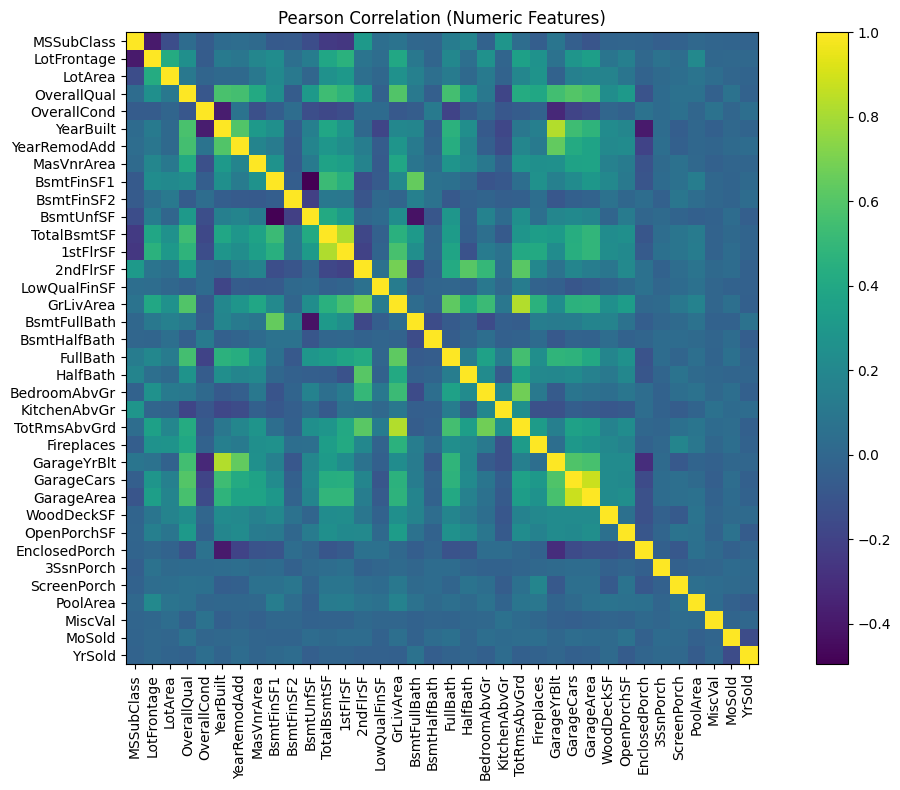

In [220]:
import matplotlib.pyplot as plt

# sadece sayısal kolonların korelasyonu
corr = X[num_cols].corr(method="pearson")

plt.figure(figsize=(12, 8))
plt.imshow(corr.values)
plt.title("Pearson Correlation (Numeric Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()


❓ **Ordinal özellikler** için, bazı **ordinal kodlanmış** özelliklerin diğerleriyle neredeyse tamamen benzer şekilde "sıralanıp" sıralanmadığını kontrol etmek için bunun yerine [Spearman rank korelasyonu](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) kullanabiliriz. Tekrar bir ısı haritası çizmekten çekinmeyin.

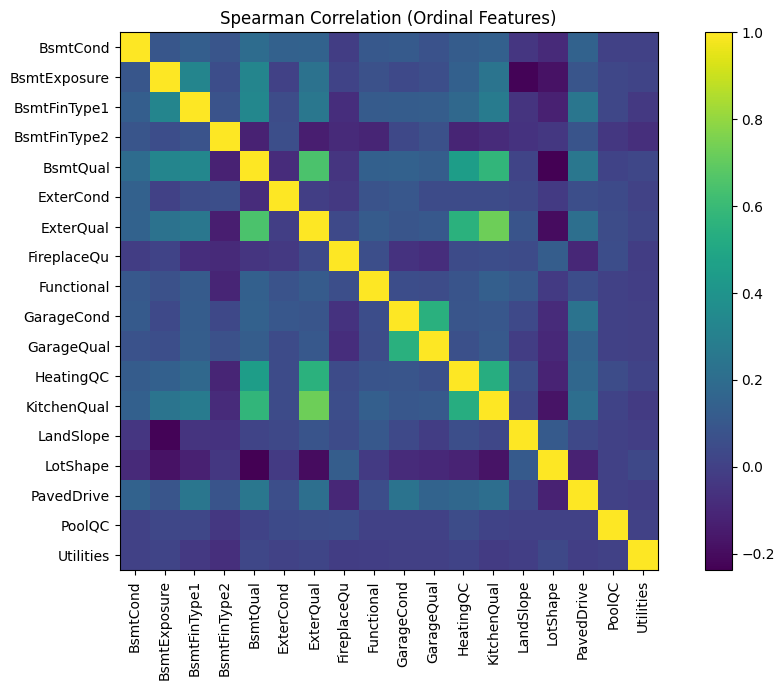

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

# Sadece ordinal kısmını alıp encode edilmiş değerleri üret
X_ord = preproc.named_transformers_["ord"].fit_transform(X[ord_cols])
X_ord = pd.DataFrame(X_ord, columns=ord_cols, index=X.index)

corr_s = X_ord.corr(method="spearman")

plt.figure(figsize=(10, 7))
plt.imshow(corr_s.values)
plt.title("Spearman Correlation (Ordinal Features)")
plt.xticks(range(len(corr_s.columns)), corr_s.columns, rotation=90)
plt.yticks(range(len(corr_s.columns)), corr_s.columns)
plt.colorbar()
plt.tight_layout()
plt.show()


❓ Şimdi, belirli bir (Spearman + Pearson) korelasyon eşiğinin ötesinde istediğiniz herhangi bir özelliği kaldıran pipeline'ınızda bir "filtre" oluşturmaktan çekinmeyin; özel bir dönüştürücü sınıfa ihtiyacınız olacak.

In [222]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold
        self.keep_idx_ = None

    def fit(self, X, y=None):
        # X numpy array ise DataFrame'e çevir (kolon isimleri olmadan index üzerinden gideceğiz)
        Xdf = pd.DataFrame(X)
        corr = Xdf.corr().abs()

        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        to_drop = [c for c in upper.columns if any(upper[c] > self.threshold)]

        keep = [c for c in Xdf.columns if c not in to_drop]
        self.keep_idx_ = np.array(keep, dtype=int)
        return self

    def transform(self, X):
        return X[:, self.keep_idx_]


In [223]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

pipe_iter3_corr = make_pipeline(
    preproc,
    CorrelationFilter(threshold=0.95),
    GradientBoostingRegressor(random_state=42)
)


### c) Döngüsel Özellikleri İşle

❓ Zaman tabanlı özelliklerimiz var, neden onları döngüsel özelliklere **dönüştürmüyoruz**?

🔎 Bunu neden ve nasıl yaptığımız hakkında daha fazla bilgi edinmek istiyorsanız, `Prepare the dataset` ünitesinin `Preprocessing Workflow` yarışmasına geri dönün.

In [224]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class CyclicMonthEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, col="MoSold", period=12, drop=True):
        self.col = col
        self.period = period
        self.drop = drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Aylar 1-12
        X[f"{self.col}_sin"] = np.sin(2 * np.pi * X[self.col] / self.period)
        X[f"{self.col}_cos"] = np.cos(2 * np.pi * X[self.col] / self.period)
        if self.drop:
            X = X.drop(columns=[self.col])
        return X


In [225]:
from sklearn.pipeline import make_pipeline

pipe_gb_cyclic = make_pipeline(
    CyclicMonthEncoder(col="MoSold", period=12, drop=True),
    preproc,
    GradientBoostingRegressor(random_state=42)
)


### d) Hedef Mühendisliği (~15dk)

❓ RMS**L**E'yi minimize etmemiz isteniyor. Hedefimizin `log`'unu doğrudan tahmin etmek için neden dönüştürmüyoruz?
- `y` hedefinin histogramını kontrol edin
- Normal dağılımlı değişkenlerin doğrusal veya parametrik modellerle tahmin edilmesi daha kolay olmalıdır
- `y_log` ve yeni performans metriklerinizi oluşturun
- Sonunda tahminlerinizin üssünü almayı unutmayın!

Text(0.5, 0, 'log(SalePrice)')

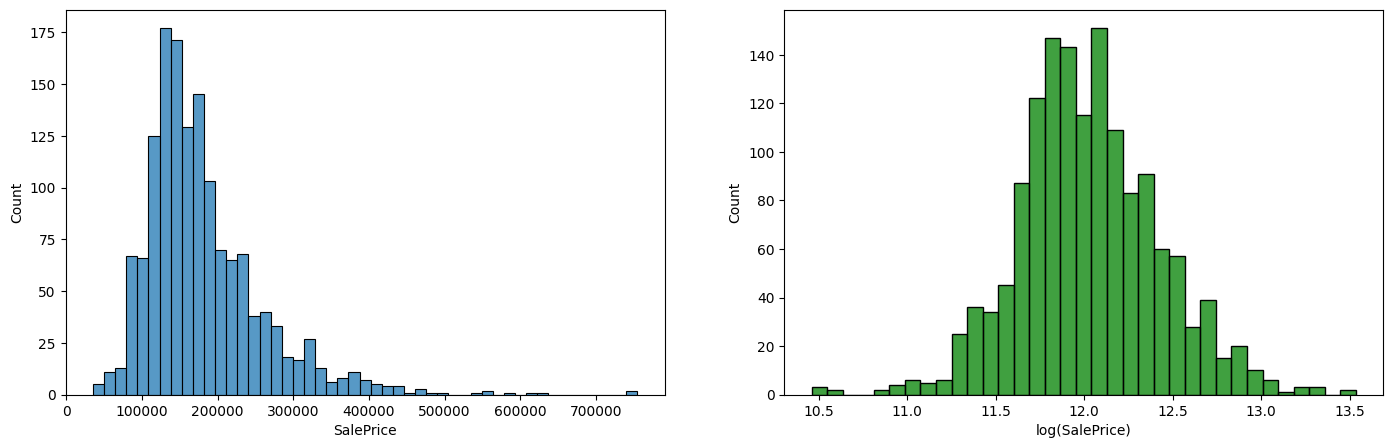

In [226]:
y_log = np.log(y)

plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
sns.histplot(y)

plt.subplot(1, 2, 2)
sns.histplot(y_log, color='green')

plt.xlabel("log(SalePrice)")

In [227]:
# Fiyat değişkeninin logaritmasını alarak dağılımı normalleştiriyoruz
target_log = np.log(y)

# Yarışma bizden RMSLE (Root Mean Squared Logarithmic Error) beklediği için özel skorlayıcı:
from sklearn.metrics import make_scorer, mean_squared_error
rmsle_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5)

## 2.2 Model İterasyonu ♻

#### a) Ön İşleme Pipeline'ının Son Versiyonu
❓ Aşağıda ön işleme pipeline'ınızın yeni bir tanımıyla başlamanızı tavsiye ediyoruz. Yukarıdaki mevcut kodunuzdan kopyala-yapıştır yapın.

Bu şekilde gerektiğinde hızlıca güncelleyebilir ve ardından mümkün olan en iyi modeli bulmak için birçok model türü deneyebilirsiniz. GridSearch deneyebilirsiniz (bu çok zaman alabilir) veya model model gidebilirsiniz.

Önceki ünitelerde ve bugün öğrendiğiniz farklı modellerden bir veya daha fazlasını deneyebilirsiniz. 

👉 Hedefleriniz:

  - **En az bir doğrusal model deneyin**
  
  - **Bu ünitede keşfettiğiniz ağaç tabanlı modellerden en az birini deneyin**.

  - Farklı modellerinizin **çapraz doğrulama** skorlarını karşılaştırın.

  - Farklı modellerin çapraz doğrulanmasının **ne kadar sürdüğünü karşılaştırmak** da ilginçtir. 🔎 Bir notebook hücresinin yürütülmesini zamanlamak için hücrenin ilk satırına `%%time` sihirli komutunu ekleyin.

In [228]:
# 1. Sıralı (Ordinal) sütunlar ve onların değer sıraları
feat_ordinal_dict = {
    "BsmtCond": ['missing', 'Po', 'Fa', 'TA', 'Gd'],
    "BsmtExposure": ['missing', 'No', 'Mn', 'Av', 'Gd'],
    "BsmtFinType1": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "ExterQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "FireplaceQu": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
}

feat_ordinal = sorted(feat_ordinal_dict.keys())
feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

# 2. Ordinal Pipeline
encoder_ordinal = OrdinalEncoder(
    categories=feat_ordinal_values_sorted,
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

preproc_ordinal = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    encoder_ordinal,
    MinMaxScaler()
)

# 3. Tüm Ön İşlemeyi Birleştirme (Column Transformer)
preproc_advanced = make_column_transformer(
    (num_pipe, num_cols),
    (preproc_ordinal, feat_ordinal),
    (cat_pipe, [c for c in feat_categorical_small if c not in feat_ordinal]),
    remainder="drop"
)

In [229]:
from xgboost import XGBRegressor

# XGBoost Pipeline oluşturma
pipe_xgb = make_pipeline(preproc_advanced, XGBRegressor(max_depth=3, n_estimators=100, learning_rate=0.1))

# Modeli eğitme (Logaritmik hedef değerle)
pipe_xgb.fit(X, target_log)

# Çapraz doğrulama (Cross-validation) skoru
cv_score = cross_val_score(pipe_xgb, X, target_log, cv=5, scoring=rmsle_scorer)
print(f"XGBoost RMSLE: {cv_score.mean():.4f}")

/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [6, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [23] during transform. These unk

XGBoost RMSLE: 0.1295


/home/tumay/.pyenv/versions/workintech/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [1, 3, 16, 19] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [230]:
# Test verisi üzerinde tahmin (logaritmik tahminleri gerçeğe döndürmek için np.exp kullanıyoruz)
predictions_log = pipe_xgb.predict(test_df)
predictions = np.exp(predictions_log)

# Kaggle için dosya hazırlama
results = pd.DataFrame({
    "Id": test_df.index,
    "SalePrice": predictions
})

results.to_csv("submission_final.csv", index=False)
print("Tahmin dosyası 'submission_final.csv' olarak kaydedildi!")

Tahmin dosyası 'submission_final.csv' olarak kaydedildi!


# 🏅GÖNDERİM 

Kaggle'a göndererek gerçek test skorunuzu keşfetme zamanı! 

👉 Modelinizin ne kadar iyi olduğunu görmek için sonraki adımları takip edin ve tamamlayın!

In [231]:
X_test = pd.read_csv("https://d32aokrjazspmn.cloudfront.net/materials/houses_test_raw.csv")

X_test_ids = X_test['Id'] # Keep ids
X_test = X_test.drop(columns=['Id'])

2.1'deki isteğe bağlı döngüsel özellik işlemini çalıştırdıysanız, X_test'i pipeline'ınıza beslemeden önce ekstra sütunları eklemek için aşağıdaki hücreyi çalıştırmanız gerekecek.

In [232]:
# If needed, add cyclical feature columns to X_test like we did to X
if 'months_in_a_year' in locals():
    # months_in_a_year is defined, so we need to add the cyclical features
    X_test['sin_MoSold'] = np.sin(2 * np.pi * (X_test.MoSold - 1) / months_in_a_year)
    X_test['cos_MoSold'] = np.cos(2 * np.pi * (X_test.MoSold - 1) / months_in_a_year)

    X_test.drop(columns=['MoSold'], inplace=True)

👉 En iyi tahminleyicinizi kullanarak tahmin yapın ve sonuçları `predictions`'da saklayın.

In [233]:
pipe_xgb.fit(X, y)
predictions = pipe_xgb.predict(X_test)


In [234]:
# 1) Pipeline'ı eğit (log hedef kullanıyorsan y_log)
pipe_xgb.fit(X, y_log)

# 2) Test tahmini al (log uzayında)
predictions_log = pipe_xgb.predict(X_test)

# 3) Log'u geri çevir
predictions = np.exp(predictions_log)


👉 Tahminlerinizi Kaggle'a göndermek için hazırlamak üzere aşağıdaki hücreleri çalıştırın.

In [235]:
# Create a DataFrame in the correct format
results = pd.concat([X_test_ids, pd.Series(predictions, name="SalePrice")], axis=1)
results

,Id,SalePrice
0,1461,118528.992188
1,1462,156364.000000
2,1463,185170.296875
3,1464,181792.031250
4,1465,198689.218750
...,...,...
1454,2915,81114.851562
1455,2916,79678.507812
1456,2917,160027.625000
1457,2918,120215.875000


In [237]:
# Export to Kaggle format submission
results.to_csv("submission_final.csv", header=True, index=False)

👉 Kaggle'a gidin ve tahminlerinizi gönderin. Test skorunuz nedir? Elde ettiğiniz doğrulama skorlarıyla karşılaştırın.
